# Manual Creation of RNN - Tensorflow

We will create three neurons in a Layer which will accept input X and provide output y which will again get feed into these neurons of that Layer

We will require 2 sets of weights
1. Wx - For input Weights on X
2. Wy - For weights on output of Original X

We will start running RNN with 2 batches of data , t=0,t=1

#### Example of RNN Data

We have 2 sequence of data.For Each of these sequence we have 5 time steps.Now we feed in based on Timesteps and not based on Sample itself.

So First batch will be everything at t=0 - So all words in sequence at t=0.
Second batch will be everything at t=1

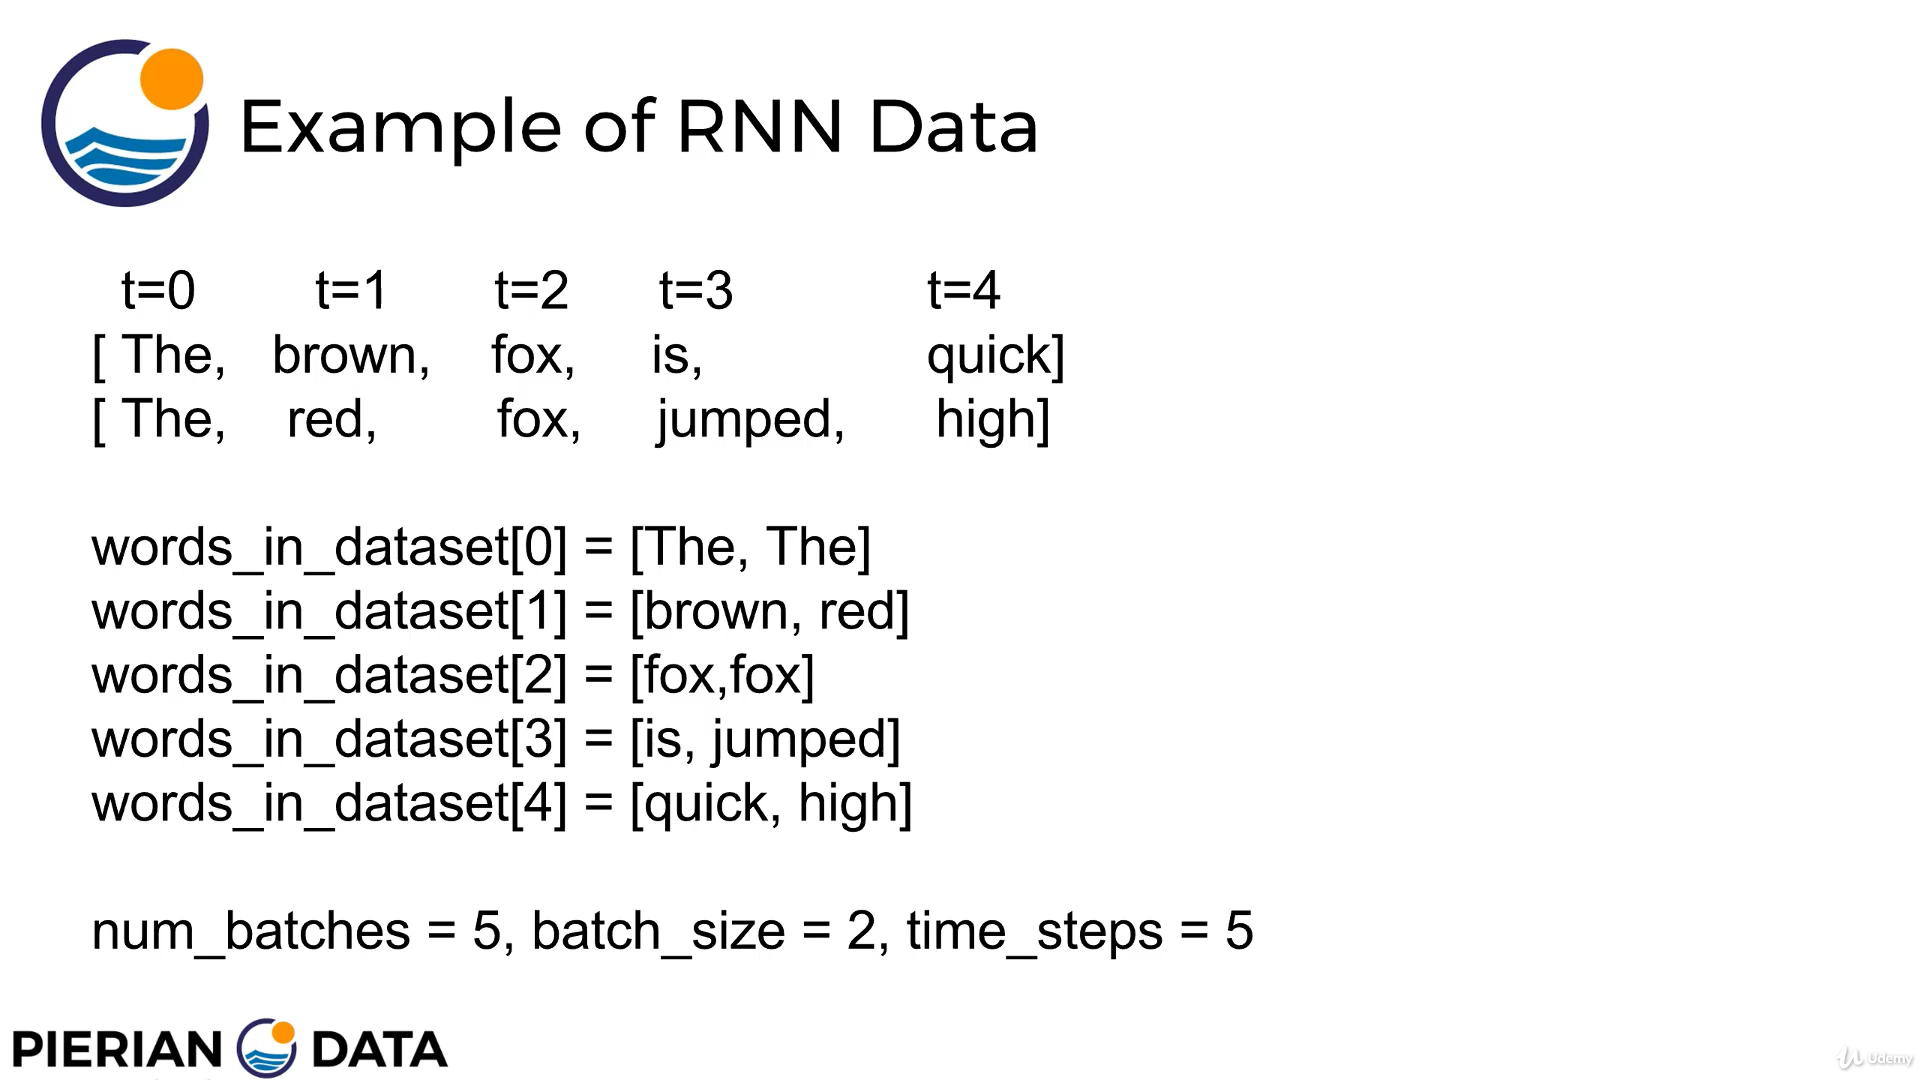

## Now we will deal with Numerical Data


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Lucky_Rathod\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Lucky_Rathod\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Lucky_Rathod\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Constants - Number of Inputs
num_inputs = 2
num_neurons = 3 #Three Neurons in First Layer

## We will only create simple layer that only has two time steps worth of information placed into it i-e 2 columns

In [3]:
# Placeholders - We will need placeholder for each time step
x0 = tf.placeholder(tf.float32,[None,num_inputs])
x1 = tf.placeholder(tf.float32,[None,num_inputs])

In [4]:
# Variables - Two sets of Variables - Weights 
Wx =  tf.Variable(tf.random_normal(shape=[num_inputs,num_neurons])) #Weights attached to initial x thats feed in - x0
## Output of x0 will be attached to another weights - Wy
Wy = tf.Variable(tf.random_normal(shape=[num_neurons,num_neurons]))
## Bias
b = tf.Variable(tf.zeros([1,num_neurons]))

In [5]:
# Graphs - Operation to perform

y0 = tf.tanh(tf.matmul(x0,Wx)+b)
y1 = tf.tanh(tf.matmul(y0,Wy)+tf.matmul(x1,Wx) + b) #Unrolled Recurrent Neural Network

In [6]:
# Create Data

## Timestamp 0
x0_batch = np.array([[0,1] , [2,3] , [4,5] ])

## Timestamp 1
x1_batch = np.array([[100,101] , [102,103] , [104,105] ])

In [9]:
# Session

init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    y0_output_values , y1_output_values = sess.run([y0,y1],feed_dict={x0:x0_batch,x1:x1_batch})    


In [10]:
y0_output_values

array([[ 0.8490919 , -0.7178823 , -0.7664526 ],
       [ 0.9999957 ,  0.41091833,  0.8901601 ],
       [ 1.        ,  0.9443384 ,  0.9991074 ]], dtype=float32)

In [11]:
y1_output_values

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

Above Manual Creation wont scale for larger time series problems.If we have 100 timesteps . Means we have to write 100 w's and 100 y's manualy and then feed in manually in timesteps.That's Tensorflow has created an API for RNN

## RNN with Tensorflow API

If we have a sequence of [1,2,3,4,5,6] , Can we predict the sequence shifted one time step forward - [2,3,4,5,6,7] .We can easily identify the pattern and able to predict 

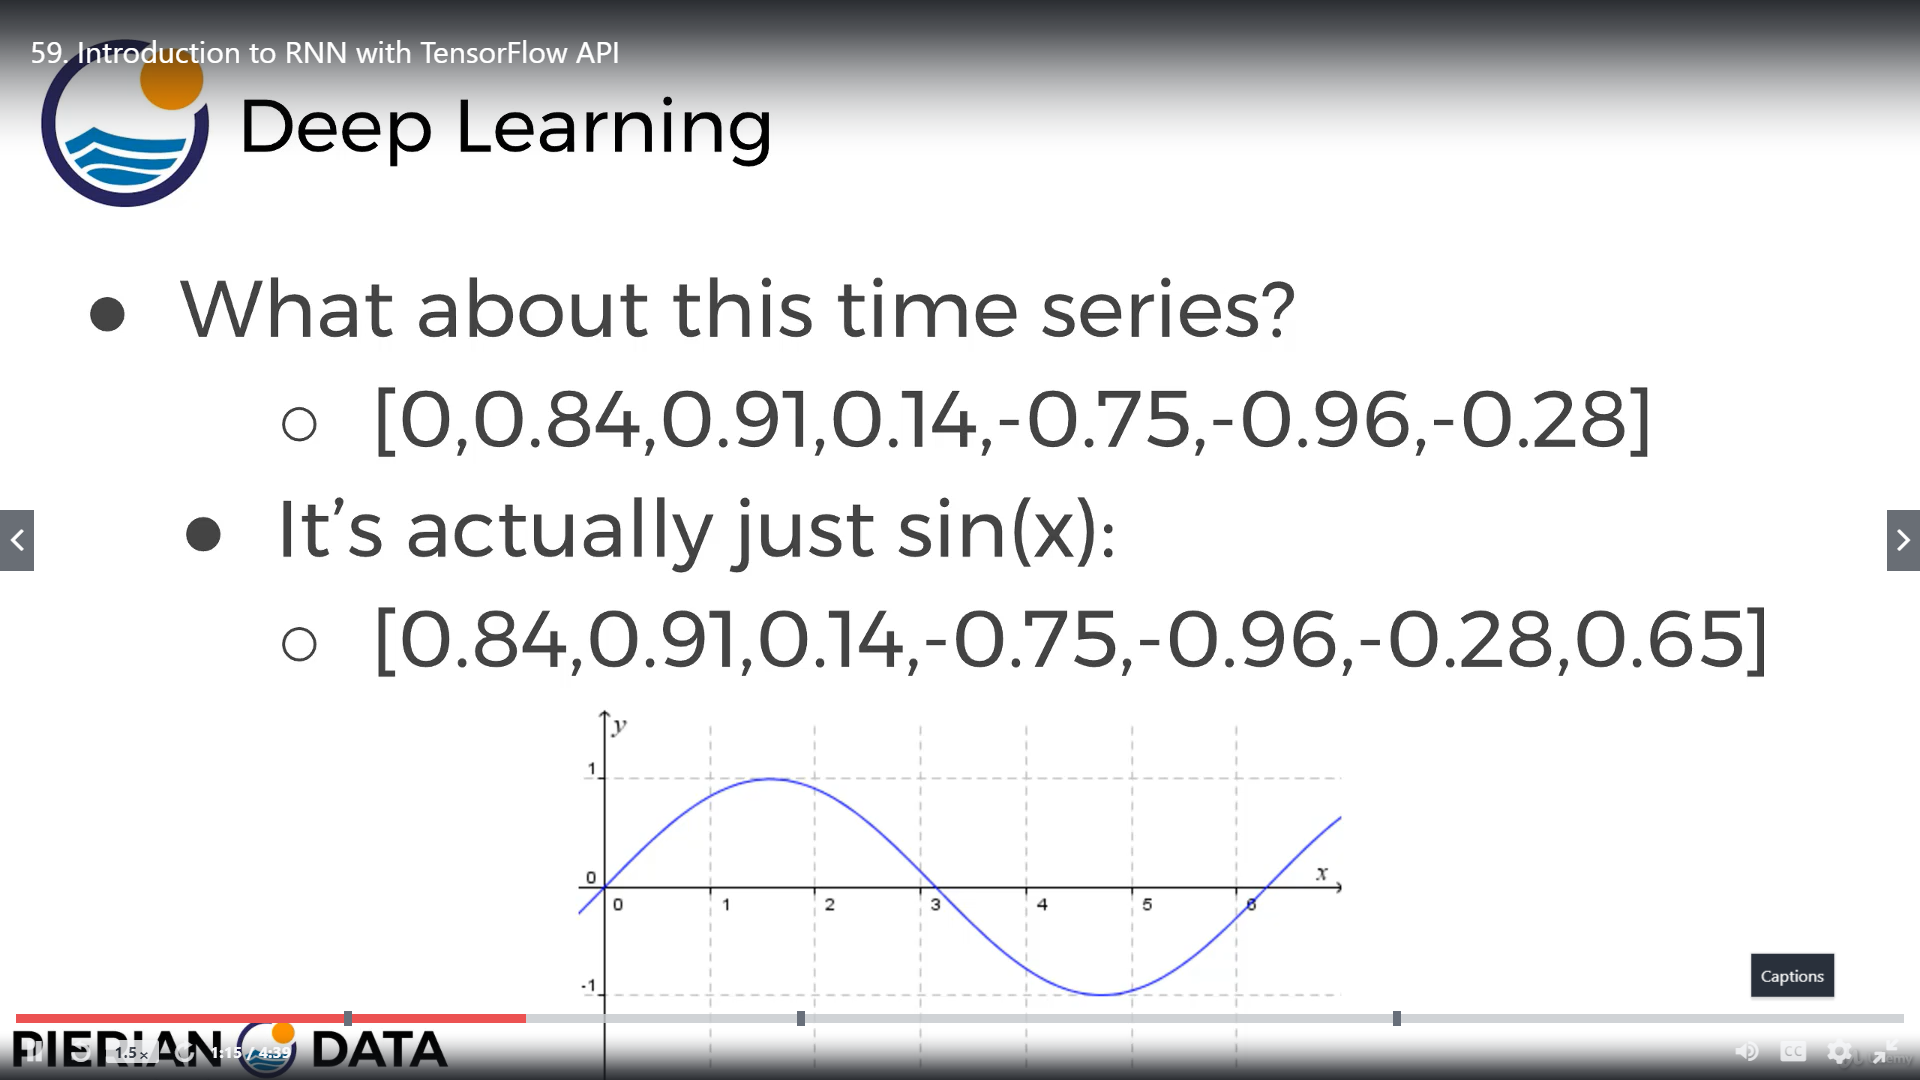

We will first create a simple class to generate sin(x) and grab random batches of sin(x)

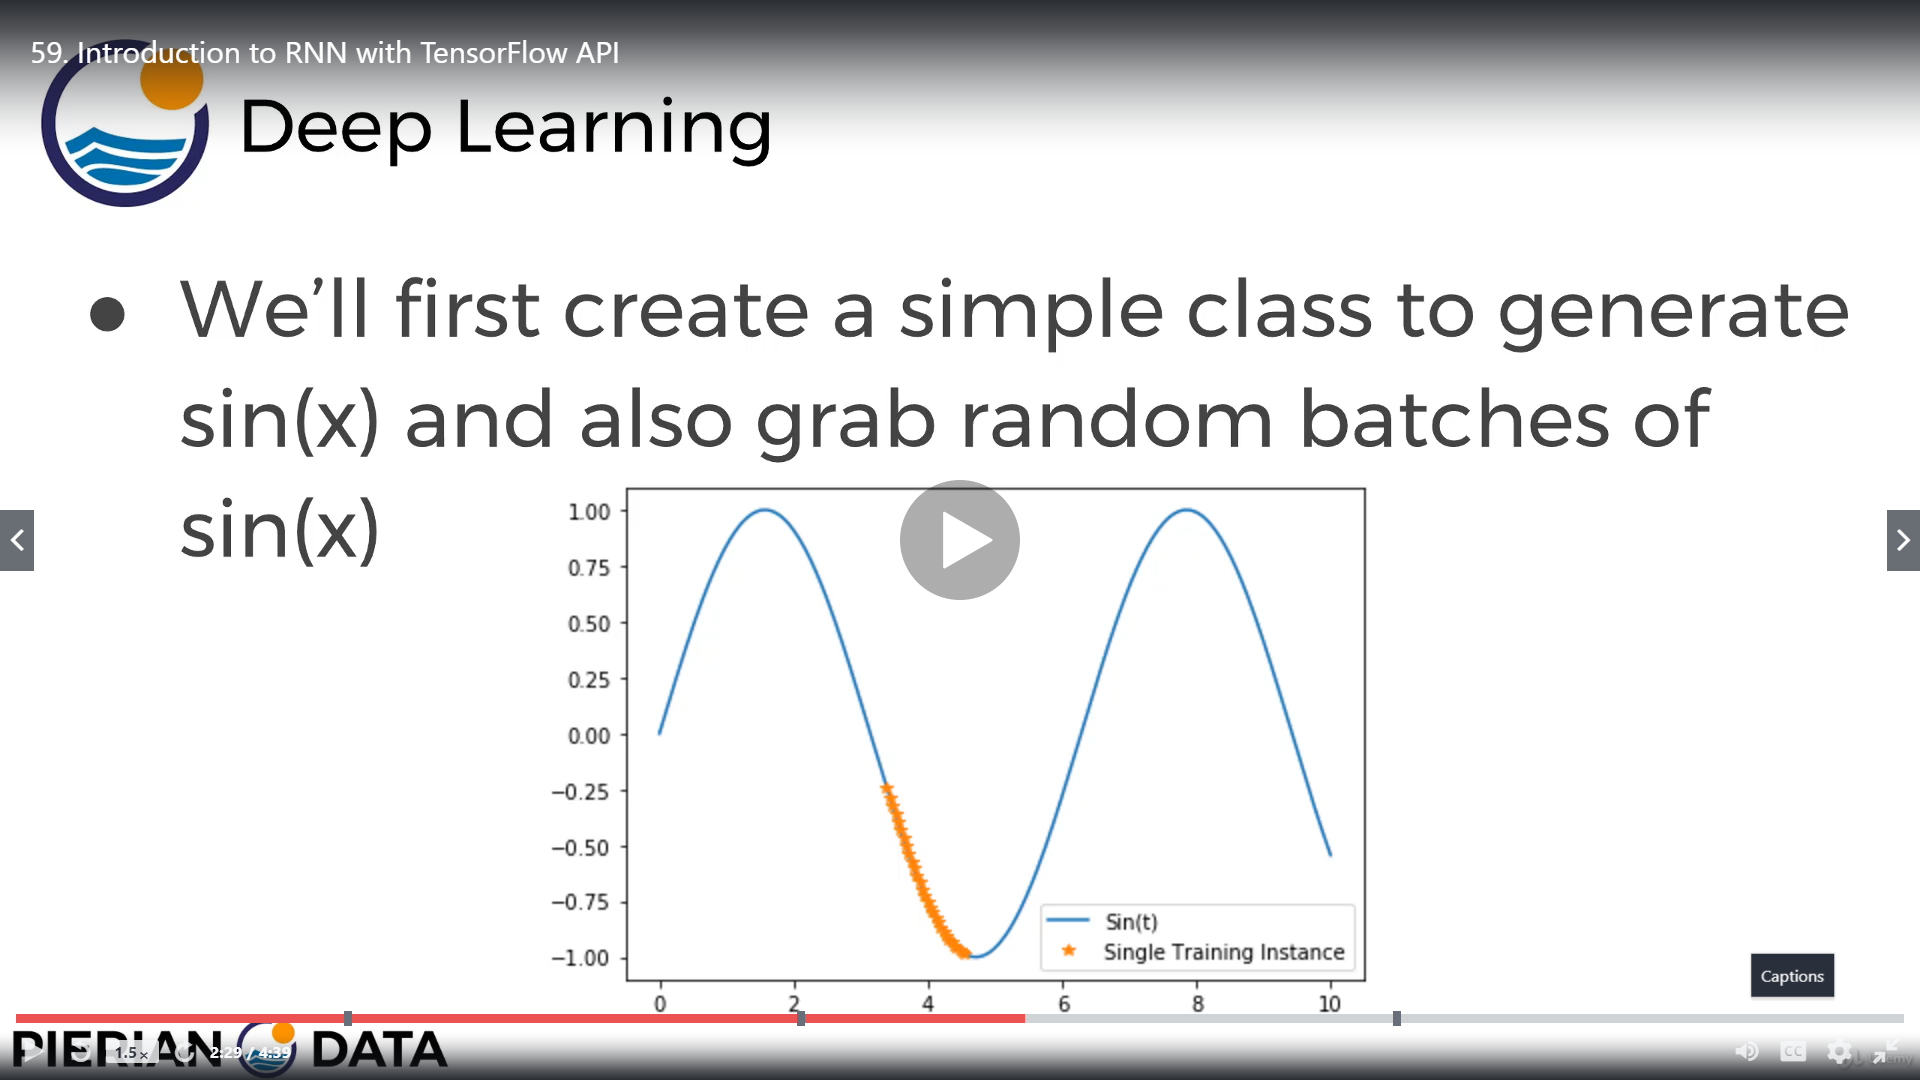

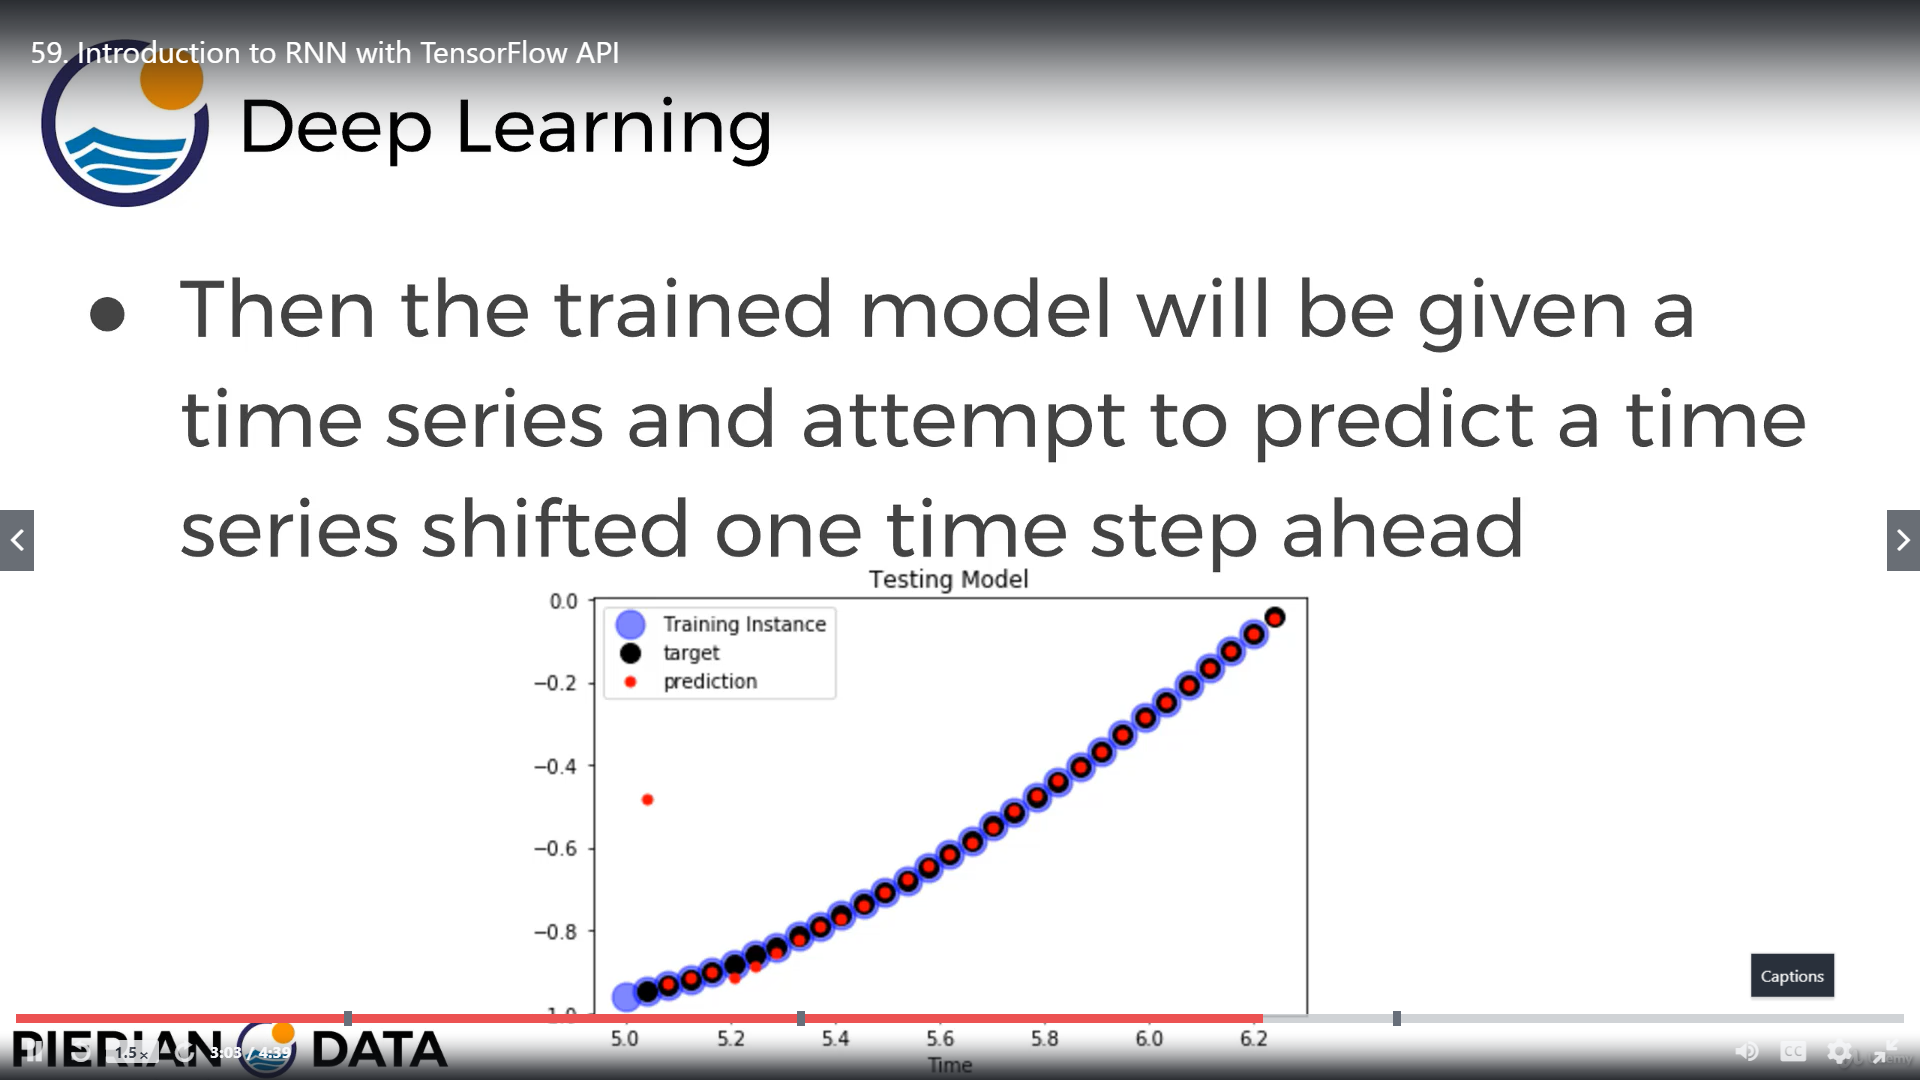

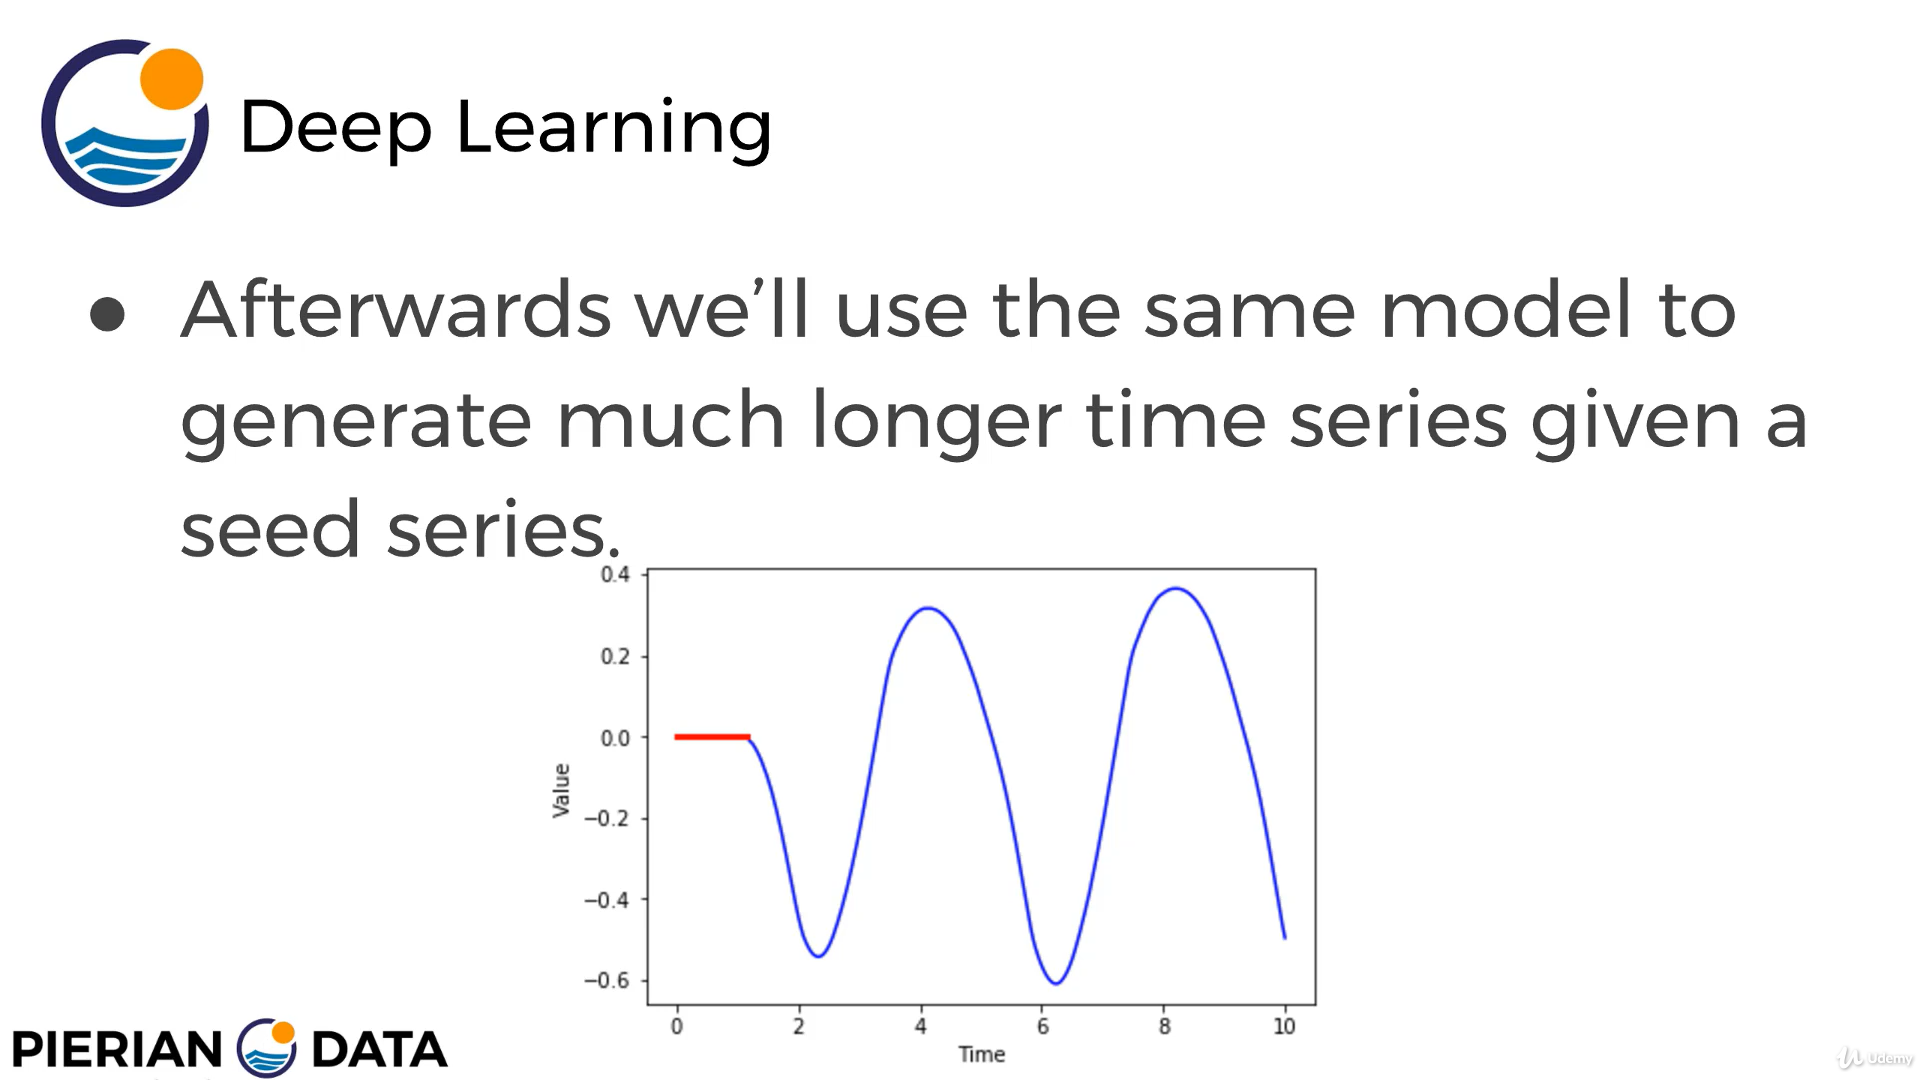


----

### RNN



In [65]:
# Import Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
class TimeSeriesData():
    
    def __init__(self,num_points,xmin,xmax):
        
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin,xmax,num_points)
        self.y_true = np.sin(self.x_data)
    
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_batch_ts=False):
        
        # Grab a random starting point for each batch
        rand_start = np.random.rand(batch_size,1) 
        
        # Convert to be on time series
        ts_start = rand_start * (self.xmax- self.xmin - (steps*self.resolution) )
        
        # Create batch Time Series on t axis
        batch_ts = ts_start + np.arange(0.0,steps+1) * self.resolution
        
        # Create Y data for time series in the batches
        y_batch = np.sin(batch_ts)
        
        # Format for RNN
        if return_batch_ts:
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) ,batch_ts
        
        else:
            
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 
        

In [67]:
ts_data =  TimeSeriesData(250,0,10) #250 points between 0 and 10

In [68]:
ts_data

In [69]:
ts_data.x_data

array([ 0.        ,  0.04016064,  0.08032129,  0.12048193,  0.16064257,
        0.20080321,  0.24096386,  0.2811245 ,  0.32128514,  0.36144578,
        0.40160643,  0.44176707,  0.48192771,  0.52208835,  0.562249  ,
        0.60240964,  0.64257028,  0.68273092,  0.72289157,  0.76305221,
        0.80321285,  0.84337349,  0.88353414,  0.92369478,  0.96385542,
        1.00401606,  1.04417671,  1.08433735,  1.12449799,  1.16465863,
        1.20481928,  1.24497992,  1.28514056,  1.3253012 ,  1.36546185,
        1.40562249,  1.44578313,  1.48594378,  1.52610442,  1.56626506,
        1.6064257 ,  1.64658635,  1.68674699,  1.72690763,  1.76706827,
        1.80722892,  1.84738956,  1.8875502 ,  1.92771084,  1.96787149,
        2.00803213,  2.04819277,  2.08835341,  2.12851406,  2.1686747 ,
        2.20883534,  2.24899598,  2.28915663,  2.32931727,  2.36947791,
        2.40963855,  2.4497992 ,  2.48995984,  2.53012048,  2.57028112,
        2.61044177,  2.65060241,  2.69076305,  2.73092369,  2.77

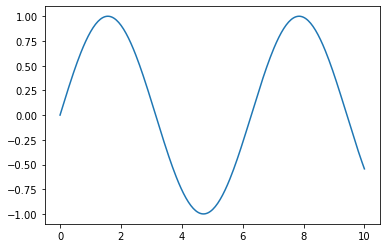

In [70]:
plt.plot(ts_data.x_data,ts_data.y_true);

In [71]:
### I want Each of my random batches to have 30 steps in it.#No of steps in batch
num_time_steps = 30   

In [72]:
y1,y2,ts = ts_data.next_batch(batch_size=1,steps=num_time_steps,return_batch_ts=True)

In [73]:
ts

array([[6.91736047, 6.95736047, 6.99736047, 7.03736047, 7.07736047,
        7.11736047, 7.15736047, 7.19736047, 7.23736047, 7.27736047,
        7.31736047, 7.35736047, 7.39736047, 7.43736047, 7.47736047,
        7.51736047, 7.55736047, 7.59736047, 7.63736047, 7.67736047,
        7.71736047, 7.75736047, 7.79736047, 7.83736047, 7.87736047,
        7.91736047, 7.95736047, 7.99736047, 8.03736047, 8.07736047,
        8.11736047]])

In [74]:
ts.shape

(1, 31)

In [75]:
# Flatten it to plot it
ts.flatten()

array([6.91736047, 6.95736047, 6.99736047, 7.03736047, 7.07736047,
       7.11736047, 7.15736047, 7.19736047, 7.23736047, 7.27736047,
       7.31736047, 7.35736047, 7.39736047, 7.43736047, 7.47736047,
       7.51736047, 7.55736047, 7.59736047, 7.63736047, 7.67736047,
       7.71736047, 7.75736047, 7.79736047, 7.83736047, 7.87736047,
       7.91736047, 7.95736047, 7.99736047, 8.03736047, 8.07736047,
       8.11736047])

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

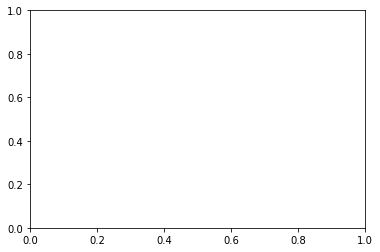

In [76]:
plt.plot(ts.flatten,y2.flatten,'*');  ### Error

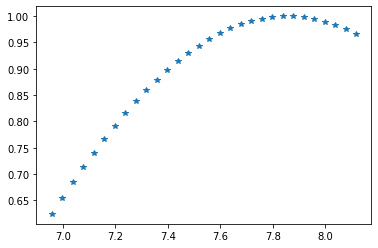

In [77]:
plt.plot(ts.flatten()[1:],y2.flatten(),'*'); #We get one part of Sin wave

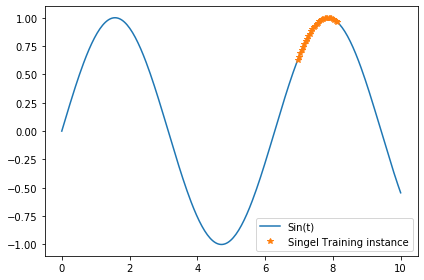

In [78]:
# Plot on original sin wave
plt.plot(ts_data.x_data,ts_data.y_true,label='Sin(t)')
plt.plot(ts.flatten()[1:],y2.flatten(),'*',label='Singel Training instance')

plt.legend()
plt.tight_layout()

In [79]:
### Training Data
train_inst = np.linspace(5,5 + ts_data.resolution * (num_time_steps + 1), num_time_steps+1)
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

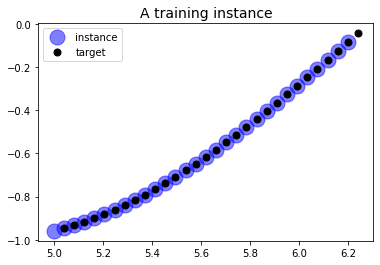

In [81]:
#So this is actual data we are going to feeding in our model and we are trainnig it 
plt.title("A training instance", fontsize=14)
plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), "bo", markersize=15,alpha=0.5 ,label="instance")
plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]), "ko", markersize=7, label="target")

plt.legend()

### Creating Model


In [82]:
tf.reset_default_graph() 

In [83]:
# Constants
num_inputs=1
num_neurons = 100
num_outputs=1
learning_rate = 0.0001
num_train_iterations =2000
batch_size=1

In [84]:
# Placeholders
X = tf.placeholder(tf.float32,[None,num_time_steps,num_inputs])
y = tf.placeholder(tf.float32,[None,num_time_steps,num_outputs])

In [85]:
# RNN Cell layer
cell = tf.contrib.rnn.BasicRNNCell(num_units=num_neurons,activation=tf.nn.relu) #We will get 100 outputs
#We will wrap 100 outputs to get One output
cell = tf.contrib.rnn.OutputProjectionWrapper(cell,output_size=num_outputs)


##### We can play around with Basic RNN CELL

# cell = tf.contrib.rnn.OutputProjectionWrapper(
#     tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
#     output_size=num_outputs)

#--------------------------------------------------------#

# n_neurons = 100
# n_layers = 3

# cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
#           for layer in range(n_layers)])

#--------------------------------------------------------#

# cell = tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu)

#--------------------------------------------------------#

# n_neurons = 100
# n_layers = 3

# cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
#           for layer in range(n_layers)])


#--------------------------------------------------------#

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [86]:
# Outputs and States of Basic RNN Cell
outputs , states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32) #It performs dynamic unrolling of inputs

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [87]:
# Loss Function and Optimizer

## Loss Function - MSE
loss = tf.reduce_mean(tf.square(outputs-y))

## Optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

## init
init = tf.global_variables_initializer()

In [88]:
# Session

## For Gpu - gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.85)

### Save model
saver = tf.train.Saver()

# GPU - with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
with tf.Session() as sess:
    
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch , y_batch = ts_data.next_batch(batch_size,num_time_steps)
        sess.run(train,feed_dict={X:X_batch,y:y_batch})
        
        if iteration % 100 ==0 :
            
            mse = loss.eval(feed_dict={X:X_batch,y:y_batch})
            print(iteration,"\t MSE " ,mse)
            
    saver.save(sess,r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\saved_models\rnn_time_series_model')
      

0 	 MSE  0.5754922
100 	 MSE  0.35186756
200 	 MSE  0.011379894
300 	 MSE  0.011535552
400 	 MSE  0.0010539695
500 	 MSE  0.023963891
600 	 MSE  0.019345935
700 	 MSE  0.0202898
800 	 MSE  0.0015038679
900 	 MSE  0.0052776216
1000 	 MSE  0.013402743
1100 	 MSE  0.001517163
1200 	 MSE  0.020874646
1300 	 MSE  0.0031284688
1400 	 MSE  0.010120387
1500 	 MSE  0.0071079307
1600 	 MSE  0.0058540376
1700 	 MSE  0.0065976316
1800 	 MSE  0.0072350227
1900 	 MSE  0.0015420248


In [89]:
## Predict Time Series One Step in Future

with tf.Session() as sess:
    
    saver.restore(sess,r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\saved_models\rnn_time_series_model')
    
    X_new = np.sin(np.array(train_inst[:-1].reshape(-1,num_time_steps,num_inputs)))
    y_pred = sess.run(outputs,feed_dict = {X:X_new})
     

INFO:tensorflow:Restoring parameters from C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\saved_models\rnn_time_series_model


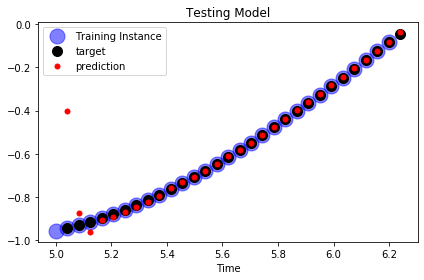

In [90]:
plt.title("Testing Model")

# Training Instance
plt.plot(train_inst[:-1], np.sin(train_inst[:-1]), "bo", markersize=15,alpha=0.5, label="Training Instance")

# Target to Predict
plt.plot(train_inst[1:], np.sin(train_inst[1:]), "ko", markersize=10, label="target")

# Models Prediction
plt.plot(train_inst[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")

plt.xlabel("Time")
plt.legend()
plt.tight_layout()

# Generating New Sequences
** Note: Can give wacky results sometimes, like exponential growth**

In [91]:
with tf.Session() as sess:
    saver.restore(sess, r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\saved_models\rnn_time_series_model')

    # SEED WITH ZEROS 
    zero_seq_seed = [0. for i in range(num_time_steps)]
    for iteration in range(len(ts_data.x_data) - num_time_steps):
        X_batch = np.array(zero_seq_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        zero_seq_seed.append(y_pred[0, -1, 0]) #At end we will have 30 zeros and then generated values

INFO:tensorflow:Restoring parameters from C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\saved_models\rnn_time_series_model


Text(0, 0.5, 'Value')

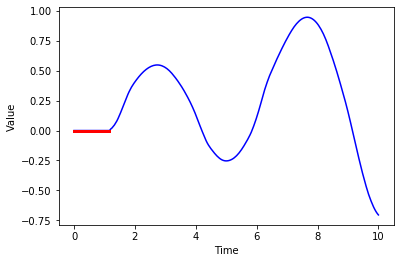

In [92]:
plt.plot(ts_data.x_data, zero_seq_seed, "b-")
plt.plot(ts_data.x_data[:num_time_steps], zero_seq_seed[:num_time_steps], "r", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

In [96]:
with tf.Session() as sess:
    saver.restore(sess, r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\saved_models\rnn_time_series_model')

    # SEED WITH Training Instance
    training_instance = list(ts_data.y_true[:30])
    for iteration in range(len(ts_data.x_data) -num_time_steps):
        X_batch = np.array(training_instance[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        training_instance.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\saved_models\rnn_time_series_model


Text(0.5, 0, 'Time')

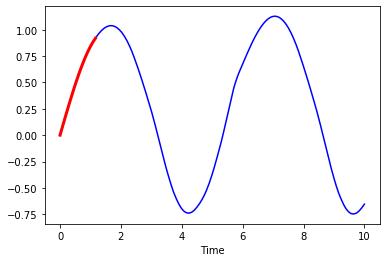

In [97]:
plt.plot(ts_data.x_data, training_instance, "b-")
plt.plot(ts_data.x_data[:num_time_steps],training_instance[:num_time_steps], "r-", linewidth=3)
plt.xlabel("Time")

-----

## Time Series Exercise 

## The Data

** Source: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line **

**Monthly milk production: pounds per cow. Jan 62 - Dec 75**

Import Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.getcwd())

C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks


In [2]:
milk = pd.read_csv('monthly-milk-production.csv',index_col='Month')
milk.head()

Milk Production
Month                               
1962-01-01 01:00:00            589.0
1962-02-01 01:00:00            561.0
1962-03-01 01:00:00            640.0
1962-04-01 01:00:00            656.0
1962-05-01 01:00:00            727.0

In [3]:
print(type(milk.index))

<class 'pandas.core.indexes.base.Index'>


In [4]:
# Make Index Time Series
milk.index = pd.to_datetime(milk.index)
print(type(milk.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


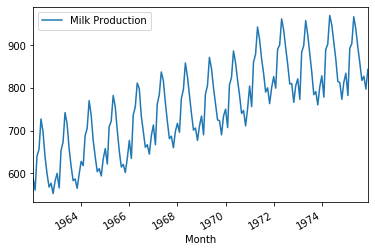

In [5]:
milk.plot()

### Train Test Split

** Let's attempt to predict a year's worth of data. (12 months or 12 steps into the future) **

** Create a test train split using indexing (hint: use .head() or tail() or .iloc[]). We don't want a random train test split, we want to specify that the test set is the last 3 months of data is the test set, with everything before it is the training. **

In [6]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [7]:
train_set = milk.head(156)
test_set = milk.tail(12)

print(train_set.head())
print('\n Test Set \n')
print(test_set)

                     Milk Production
Month                               
1962-01-01 01:00:00            589.0
1962-02-01 01:00:00            561.0
1962-03-01 01:00:00            640.0
1962-04-01 01:00:00            656.0
1962-05-01 01:00:00            727.0

 Test Set 

                     Milk Production
Month                               
1975-01-01 01:00:00            834.0
1975-02-01 01:00:00            782.0
1975-03-01 01:00:00            892.0
1975-04-01 01:00:00            903.0
1975-05-01 01:00:00            966.0
1975-06-01 01:00:00            937.0
1975-07-01 01:00:00            896.0
1975-08-01 01:00:00            858.0
1975-09-01 01:00:00            817.0
1975-10-01 01:00:00            827.0
1975-11-01 01:00:00            797.0
1975-12-01 01:00:00            843.0


### Scale the Data

** Use sklearn.preprocessing to scale the data using the MinMaxScaler. Remember to only fit_transform on the training data, then transform the test data. You shouldn't fit on the test data as well, otherwise you are assuming you would know about future behavior!**

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_set)
test_scaled = scaler.transform(test_set)

### Batch Function

In [9]:
def next_batch(training_data,batch_size,steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """
    
    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    # Remember that each batch needs have the same number of steps in it.
    # This means you should limit the starting point to len(data)-steps
    rand_start = np.random.randint(0,len(training_data)-steps)
    
    # STEP 2: Now that you have a starting index you'll need to index the data from
    # the random start to random start + steps. Then reshape this data to be (1,steps)
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    
    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # You'll need to reshape these into tensors for the RNN. Depending on your indexing it
    # will be either .reshape(-1,steps-1,1) or .reshape(-1,steps,1)
    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1)

### Setting Up RNN Model



In [10]:
import tensorflow as tf

#### Constants

In [11]:
# Just one feature, the time series
num_inputs = 1
# Num of steps in each batch
num_time_steps = 12
# 100 neuron layer, play with this
num_neurons = 100
# Just one output, predicted time series
num_outputs = 1

## You can also try increasing iterations, but decreasing learning rate
# learning rate you can play with this
learning_rate = 0.03 
# how many iterations to go through (training steps), you can play with this
num_train_iterations = 4000
# Size of the batch of data
batch_size = 1

#### Placeholders

In [12]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

#### RNN Cell Layer

** Now create the RNN Layer, you have complete freedom over this, use tf.contrib.rnn and choose anything you want, OutputProjectionWrappers, BasicRNNCells, BasicLSTMCells, MultiRNNCell, GRUCell etc... Keep in mind not every combination will work well! (If in doubt, the solutions used an Outputprojection Wrapper around a basic LSTM cell with relu activation.**

In [13]:
# Also play around with GRUCell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


#### Outputs and Sates of RNN Cell


In [14]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### Loss Function , Optimizer , Session

In [15]:
# Loss Function
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

# Initialize Varaibles
init = tf.global_variables_initializer()

# Save Model
saver = tf.train.Saver()

# Session

##  Run a tf.Session that trains on the batches created by your next_batch function. 
##  Also add an a loss evaluation for every 100 training iterations. Remember to save your model after you are done training. 

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, r"C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\milk_production_models\ex_time_series_model")
    
    

0 	MSE: 0.36087957
100 	MSE: 0.016209485
200 	MSE: 0.0067223166
300 	MSE: 0.009527229
400 	MSE: 0.008333447
500 	MSE: 0.0098121185
600 	MSE: 0.009136477
700 	MSE: 0.011009139
800 	MSE: 0.006922729
900 	MSE: 0.006637025
1000 	MSE: 0.007155827
1100 	MSE: 0.0048338613
1200 	MSE: 0.0054413737
1300 	MSE: 0.008414701
1400 	MSE: 0.003927411
1500 	MSE: 0.0059162476
1600 	MSE: 0.004079124
1700 	MSE: 0.0067778924
1800 	MSE: 0.0066683427
1900 	MSE: 0.0058218483
2000 	MSE: 0.005682245
2100 	MSE: 0.006349169
2200 	MSE: 0.0077771847
2300 	MSE: 0.005310572
2400 	MSE: 0.008372369
2500 	MSE: 0.008563216
2600 	MSE: 0.0033724774
2700 	MSE: 0.003350435
2800 	MSE: 0.010302215
2900 	MSE: 0.0048300284
3000 	MSE: 0.0030301772
3100 	MSE: 0.003153321
3200 	MSE: 0.00692121
3300 	MSE: 0.0029545736
3400 	MSE: 0.0029076983
3500 	MSE: 0.004665401
3600 	MSE: 0.005251834
3700 	MSE: 0.0042199553
3800 	MSE: 0.0031127867
3900 	MSE: 0.0029438355


## Predicting Future (Test Data)

** Show the test_set (the last 12 months of your original complete data set) **

In [16]:
test_set

Milk Production
Month                               
1975-01-01 01:00:00            834.0
1975-02-01 01:00:00            782.0
1975-03-01 01:00:00            892.0
1975-04-01 01:00:00            903.0
1975-05-01 01:00:00            966.0
1975-06-01 01:00:00            937.0
1975-07-01 01:00:00            896.0
1975-08-01 01:00:00            858.0
1975-09-01 01:00:00            817.0
1975-10-01 01:00:00            827.0
1975-11-01 01:00:00            797.0
1975-12-01 01:00:00            843.0

** Now we want to attempt to predict these 12 months of data, using only the training data we had. To do this we will feed in a seed training_instance of the last 12 months of the training_set of data to predict 12 months into the future. Then we will be able to compare our generated 12 months to our actual true historical values from the test set! **

# Generative Session

### NOTE: Recall that our model is really only trained to predict 1 time step ahead, asking it to generate 12 steps is a big ask, and technically not what it was trained to do! Think of this more as generating new values based off some previous pattern, rather than trying to directly predict the future. You would need to go back to the original model and train the model to predict 12 time steps ahead to really get a higher accuracy on the test data. (Which has its limits due to the smaller size of our data set)

** Fill out the session code below to generate 12 months of data based off the last 12 months of data from the training set. The hardest part about this is adjusting the arrays with their shapes and sizes. Reference the lecture for hints.**

Create a Session

In [17]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, r"C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\milk_production_models\ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-12:])
    
    ## Now create a for loop that 
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\milk_production_models\ex_time_series_model


In [18]:
train_seed

[array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625]),
 0.5640092,
 0.5607916,
 0.5601946,
 0.6208324,
 0.69218564,
 0.79838425,
 0.8618364,
 0.81978023,
 0.7248371,
 0.6101861,
 0.50470024,
 0.47759157]

** Grab the portion of the results that are the generated values and apply inverse_transform on them to turn them back into milk production value units (lbs per cow). Also reshape the results to be (12,1) so we can easily add them to the test_set dataframe.**

In [19]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))
results

array([[787.6278 ],
       [786.2893 ],
       [786.04095],
       [811.2663 ],
       [840.9492 ],
       [885.1278 ],
       [911.5239 ],
       [894.0286 ],
       [854.5322 ],
       [806.8374 ],
       [762.9553 ],
       [751.6781 ]], dtype=float32)

** Create a new column on the test_set called "Generated" and set it equal to the generated results. You may get a warning about this, feel free to ignore it.**

In [20]:
test_set['Generated'] = results
test_set

C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Milk Production   Generated
Month                                           
1975-01-01 01:00:00            834.0  787.627808
1975-02-01 01:00:00            782.0  786.289307
1975-03-01 01:00:00            892.0  786.040955
1975-04-01 01:00:00            903.0  811.266296
1975-05-01 01:00:00            966.0  840.949219
1975-06-01 01:00:00            937.0  885.127808
1975-07-01 01:00:00            896.0  911.523926
1975-08-01 01:00:00            858.0  894.028625
1975-09-01 01:00:00            817.0  854.532227
1975-10-01 01:00:00            827.0  806.837402
1975-11-01 01:00:00            797.0  762.955322
1975-12-01 01:00:00            843.0  751.678101

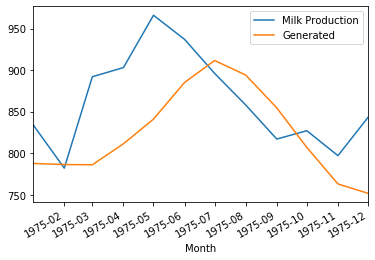

In [21]:
test_set.plot()

Play around with the parameters and RNN layers, does a faster learning rate with more steps improve the model? What about GRU or BasicRNN units? What if you train the original model to not just predict one timestep ahead into the future, but 3 instead? Lots of stuff to add on here!

### Using Tutorial Model



In [22]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, r"C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-12:])
    
    ## Now create a for loop that 
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])
        
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

test_set['Generated'] = results
test_set

INFO:tensorflow:Restoring parameters from C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\ex_time_series_model


C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Milk Production   Generated
Month                                           
1975-01-01 01:00:00            834.0  825.486877
1975-02-01 01:00:00            782.0  806.589233
1975-03-01 01:00:00            892.0  894.516785
1975-04-01 01:00:00            903.0  898.137329
1975-05-01 01:00:00            966.0  959.006165
1975-06-01 01:00:00            937.0  933.891113
1975-07-01 01:00:00            896.0  908.463257
1975-08-01 01:00:00            858.0  879.789551
1975-09-01 01:00:00            817.0  841.445618
1975-10-01 01:00:00            827.0  846.204346
1975-11-01 01:00:00            797.0  820.932678
1975-12-01 01:00:00            843.0  850.912659

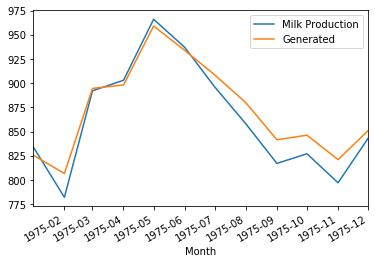

In [23]:
test_set.plot()

## Train with GRU

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
milk = pd.read_csv('monthly-milk-production.csv',index_col='Month')

milk.index = pd.to_datetime(milk.index)
train_set = milk.head(156)
test_set = milk.tail(12)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_set)
test_scaled = scaler.transform(test_set)

def next_batch(training_data,batch_size,steps):
    
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

import tensorflow as tf

# Just one feature, the time series
num_inputs = 1
# Num of steps in each batch
num_time_steps = 12
# 100 neuron layer, play with this
num_neurons = 100
# Just one output, predicted time series
num_outputs = 1

## You can also try increasing iterations, but decreasing learning rate
# learning rate you can play with this
learning_rate = 0.001
# how many iterations to go through (training steps), you can play with this
num_train_iterations = 6000
# Size of the batch of data
batch_size = 1


X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

# Also play around with GRUCell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.GRUCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 

outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, r"C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\milk_production_models\train_in_gru\ex_time_series_model")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
0 	MSE: 0.03669368
100 	MSE: 0.013535407
200 	MSE: 0.019414702
300 	MSE: 0.017720139
400 	MSE: 0.016002

## Predict Future With GRU



In [2]:
test_set

Milk Production
Month                               
1975-01-01 01:00:00            834.0
1975-02-01 01:00:00            782.0
1975-03-01 01:00:00            892.0
1975-04-01 01:00:00            903.0
1975-05-01 01:00:00            966.0
1975-06-01 01:00:00            937.0
1975-07-01 01:00:00            896.0
1975-08-01 01:00:00            858.0
1975-09-01 01:00:00            817.0
1975-10-01 01:00:00            827.0
1975-11-01 01:00:00            797.0
1975-12-01 01:00:00            843.0

In [3]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, r"C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\milk_production_models\train_in_gru\ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-12:])
    
    ## Now create a for loop that 
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])
        
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

test_set['Generated'] = results
test_set

INFO:tensorflow:Restoring parameters from C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\milk_production_models\train_in_gru\ex_time_series_model


C:\Users\Lucky_Rathod\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Milk Production   Generated
Month                                           
1975-01-01 01:00:00            834.0  839.782593
1975-02-01 01:00:00            782.0  790.644592
1975-03-01 01:00:00            892.0  866.748657
1975-04-01 01:00:00            903.0  927.437317
1975-05-01 01:00:00            966.0  981.485107
1975-06-01 01:00:00            937.0  996.984314
1975-07-01 01:00:00            896.0  947.981079
1975-08-01 01:00:00            858.0  889.255066
1975-09-01 01:00:00            817.0  848.439148
1975-10-01 01:00:00            827.0  839.204285
1975-11-01 01:00:00            797.0  802.687134
1975-12-01 01:00:00            843.0  840.480347

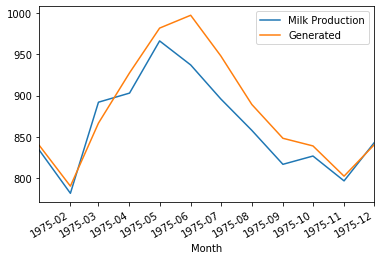

In [4]:
test_set.plot()

----------

## Word2Vect

For Word2Vect , It is highly recommended that you dont use tensorflow instead use Gensim library

Walkthrough:

https://www.tensorflow.org/tutorials/word2vec

Raw Code: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/word2vec/word2vec_basic.py

In [5]:
import collections
import math
import os
import errno
import random
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange 
import tensorflow as tf

# Step 1: The data.

In [6]:
# If word2vec_data/words is not available in current working directory.It will get downloaded

data_dir = "word2vec_data/words"
data_url = 'http://mattmahoney.net/dc/text8.zip'

def fetch_words_data(url=data_url, words_data=data_dir):
    
    # Make the Dir if it does not exist
    os.makedirs(words_data, exist_ok=True)
    
    # Path to zip file 
    zip_path = os.path.join(words_data, "words.zip")
    
    # If the zip file isn't there, download it from the data url
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(url, zip_path)
        
    # Now that the zip file is there, get the data from it
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    
    # Return a list of all the words in the data source.
    return data.decode("ascii").split()

# Use Defaults (this make take awhile!!)
words = fetch_words_data()

In [7]:
# Total words
len(words)

17005207

In [8]:
# Random slice of words
words[9000:9040]

['feelings',
 'and',
 'the',
 'auditory',
 'system',
 'of',
 'a',
 'person',
 'without',
 'autism',
 'often',
 'cannot',
 'sense',
 'the',
 'fluctuations',
 'what',
 'seems',
 'to',
 'non',
 'autistic',
 'people',
 'like',
 'a',
 'high',
 'pitched',
 'sing',
 'song',
 'or',
 'flat',
 'robot',
 'like',
 'voice',
 'is',
 'common',
 'in',
 'autistic',
 'children',
 'some',
 'autistic',
 'children']

Combine all words

In [9]:
for w in words[9000:9040]:
    print(w,end=' ')

feelings and the auditory system of a person without autism often cannot sense the fluctuations what seems to non autistic people like a high pitched sing song or flat robot like voice is common in autistic children some autistic children 

## Build Word Counts

In [25]:
from collections import Counter

mylist = ["one",'one','two','three','four','one','two']
Counter(mylist)

Counter({'one': 3, 'two': 2, 'three': 1, 'four': 1})

In [27]:
v = Counter(mylist).most_common(2)
v

[('one', 3), ('two', 2)]

## Create Word Data and Vocab

In [31]:
def create_counts(vocab_size=50000):

    # Begin adding vocab counts with Counter
    
    ## words - 17005207 words - will only take 50000
    vocab = [] + Counter(words).most_common(vocab_size )
    
    # Turn into a numpy array
    # Grab the word from the most common word vocab from above
    vocab = np.array([word for word, _ in vocab])
    
    
    dictionary = {word: code for code, word in enumerate(vocab)}
    data = np.array([dictionary.get(word, 0) for word in words])
    return data,vocab

In [32]:
vocab_size = 50000

In [34]:
# This may take awhile
data,vocabulary = create_counts(vocab_size=vocab_size)

In [36]:
data.shape

(17005207,)

In [37]:
vocabulary.shape

(50000,)

In [38]:
# if i were to grab the value at 100 in words
words[100]

'interpretations'

In [39]:
# Data will tell me what number vocab word it is
data[100]

4186

In [40]:
vocabulary[data[100]]

'interpretations'

In [41]:
(words[100],data[100])

('interpretations', 4186)

## Function for Batches

Direct from the word2vec file from TensorFlow Docs

In [42]:
def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1  # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    if data_index + span > len(data):
        data_index = 0
    buffer.extend(data[data_index:data_index + span])
    data_index += span
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [skip_window]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
    if data_index == len(data):
        buffer[:] = data[:span]
        data_index = span
    else:
        buffer.append(data[data_index])
        data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels

In [43]:
data_index=0
batch, labels = generate_batch(8, 2, 1)

In [44]:
batch

array([3080, 3080, 3080, 3080, 3080, 3080, 3080, 3080])

In [45]:
labels

array([[5233],
       [  11],
       [  11],
       [5233],
       [  11],
       [5233],
       [  11],
       [5233]])

# Constants



In [46]:
# Size of the batch
batch_size = 128

# Dimension of embedding vector - More Dimension more information 
embedding_size = 150

# How many words to consider left and right (the bigger, the longer the training)
skip_window = 1       

# How many times to reuse an input to generate a label
num_skips = 2        

### Random Validation set to sample nearest neighbours

In [47]:
# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.

# Random set of words to evaluate similarity on.
valid_size = 16   

# Only pick dev samples in the head of the distribution.
valid_window = 100  
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

# Number of negative examples to sample.
num_sampled = 64   

# Model Learning Rate
learning_rate = 0.01

# How many words in vocab
vocabulary_size = 50000

## TensorFlow Placeholders and Constants

In [48]:
tf.reset_default_graph()

# Input data.
train_inputs = tf.placeholder(tf.int32, shape=[None])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

## Variables


In [49]:
# Look up embeddings for inputs.

## Random Embeddings at First from -1 to 1
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

# Looks up IDs in list of embedding tensors
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

## Loss Function , Optimizer , Session


In [51]:
# NCE LOSS FUNCTION
# Construct the variables for the NCE loss
nce_weights = tf.Variable(tf.truncated_normal([vocabulary_size, embedding_size],stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Optimizer

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=1.0)
trainer = optimizer.minimize(loss)


# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keep_dims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# Add variable initializer.
init = tf.global_variables_initializer()

# Session

# Usually needs to be quite large to get good results, 
# training takes a long time!
num_steps = 5000  # Change these for better accuracy

with tf.Session() as sess:
    sess.run(init)
    average_loss = 0
    for step in range(num_steps):
         
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        empty, loss_val = sess.run([trainer, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 1000 == 0:
            if step > 0:
                average_loss /= 1000
            # The average loss is an estimate of the loss over the last 1000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

       

    final_embeddings = normalized_embeddings.eval()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Average loss at step  0 :  285.2213134765625
Average loss at step  1000 :  10678.843615844726
Average loss at step  2000 :  25133.476835266112
Average loss at step  3000 :  27873.8159397583
Average loss at step  4000 :  32581.335827911378


# Visualizing Results

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

## TSNE

* https://lvdmaaten.github.io/tsne/
* https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

Dimensionality reduction to 2-D vectors (down from 150), this takes awhile.

In [53]:
type(final_embeddings)

numpy.ndarray

In [54]:
final_embeddings.shape

(50000, 150)

In [55]:
from  sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [56]:
plot_only = 500 #Change these to see many words
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])

In [57]:
labels = [vocabulary[i] for i in range(plot_only)]

In [58]:
low_dim_embs.shape

(500, 2)

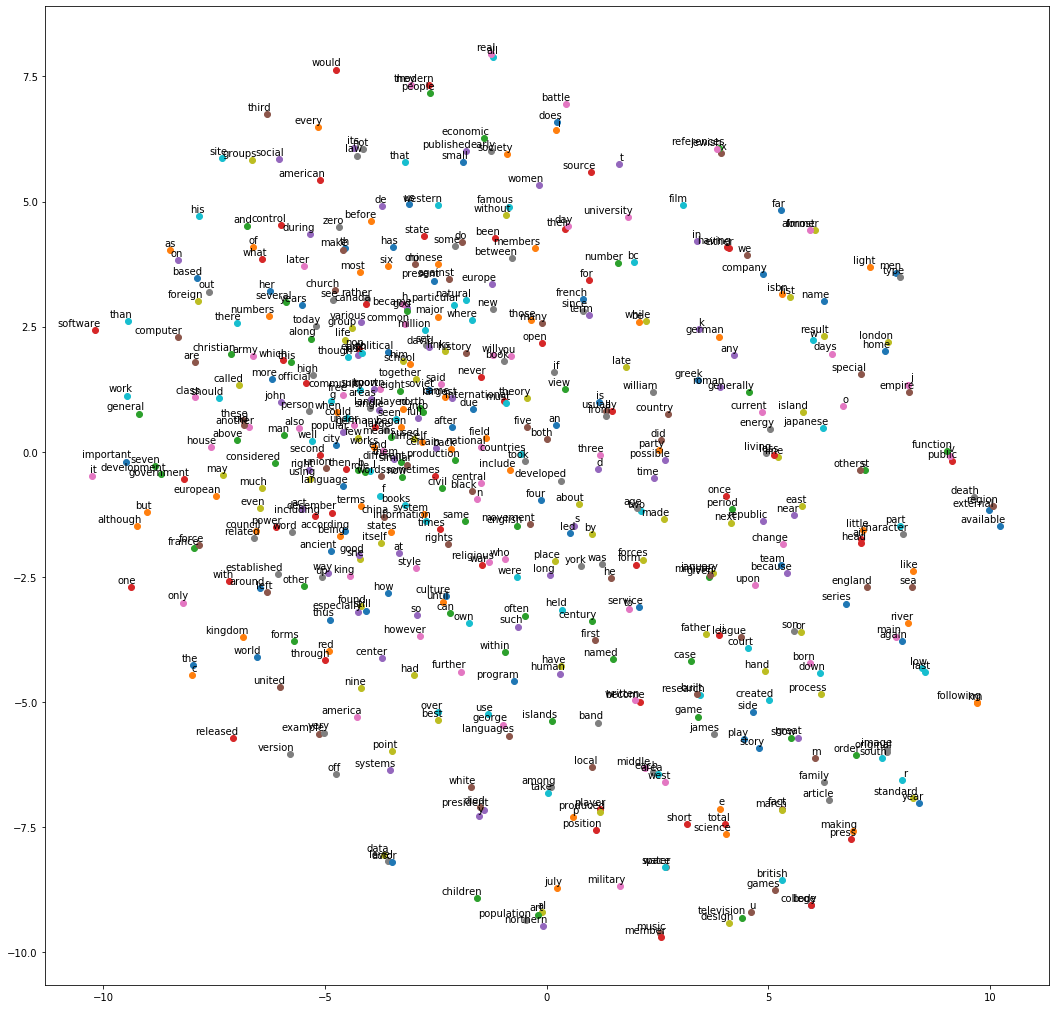

In [59]:
plot_with_labels(low_dim_embs, labels)

(-10, 10)

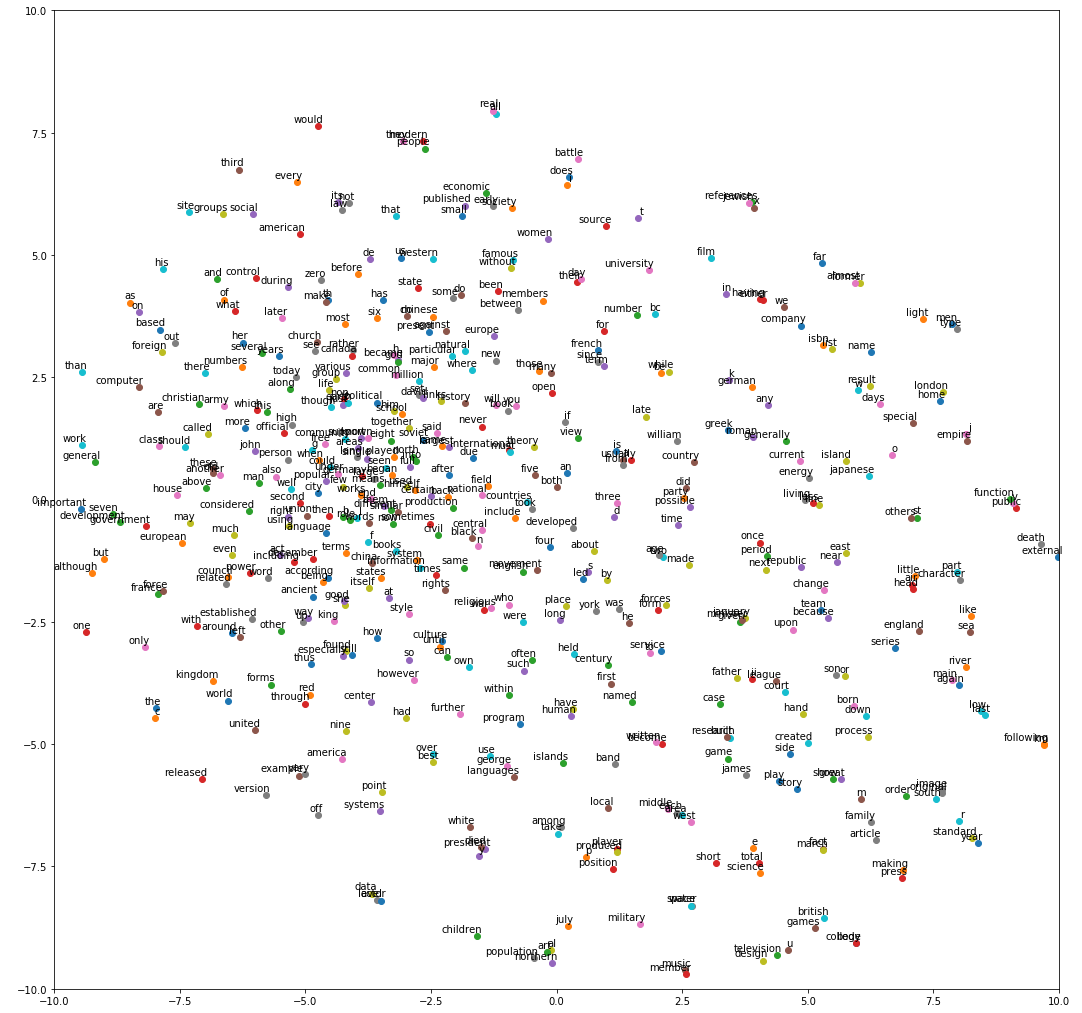

In [60]:
plot_with_labels(low_dim_embs, labels)
plt.xlim(-10,10)
plt.ylim(-10,10)

## Also check out gensim!

https://radimrehurek.com/gensim/tutorial.html

https://stackoverflow.com/questions/40074412/word2vec-get-nearest-words

In [61]:
np.save(r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\Word_Embedding_Data\trained_embeddings_5k_steps',final_embeddings)

In [63]:
final_embeddings = np.load(r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\04-Recurrent-Neural-Networks\trained_embeddings_200k_steps.npy')

type(final_embeddings)

numpy.ndarray

In [64]:
final_embeddings.shape

(50000, 150)

In [65]:
from  sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [66]:
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])

In [67]:
labels = [vocabulary[i] for i in range(plot_only)]
low_dim_embs.shape

(500, 2)

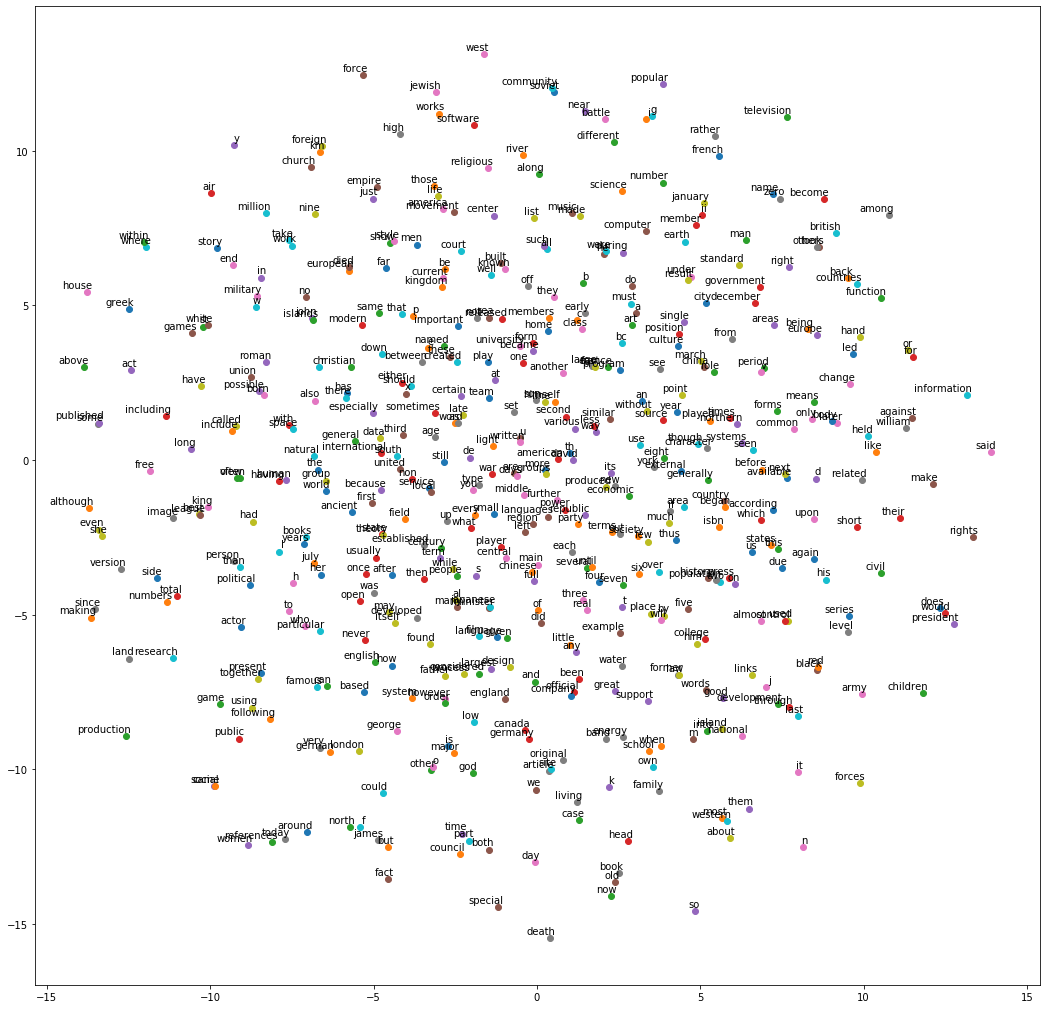

In [68]:
plot_with_labels(low_dim_embs, labels)

(-10, 10)

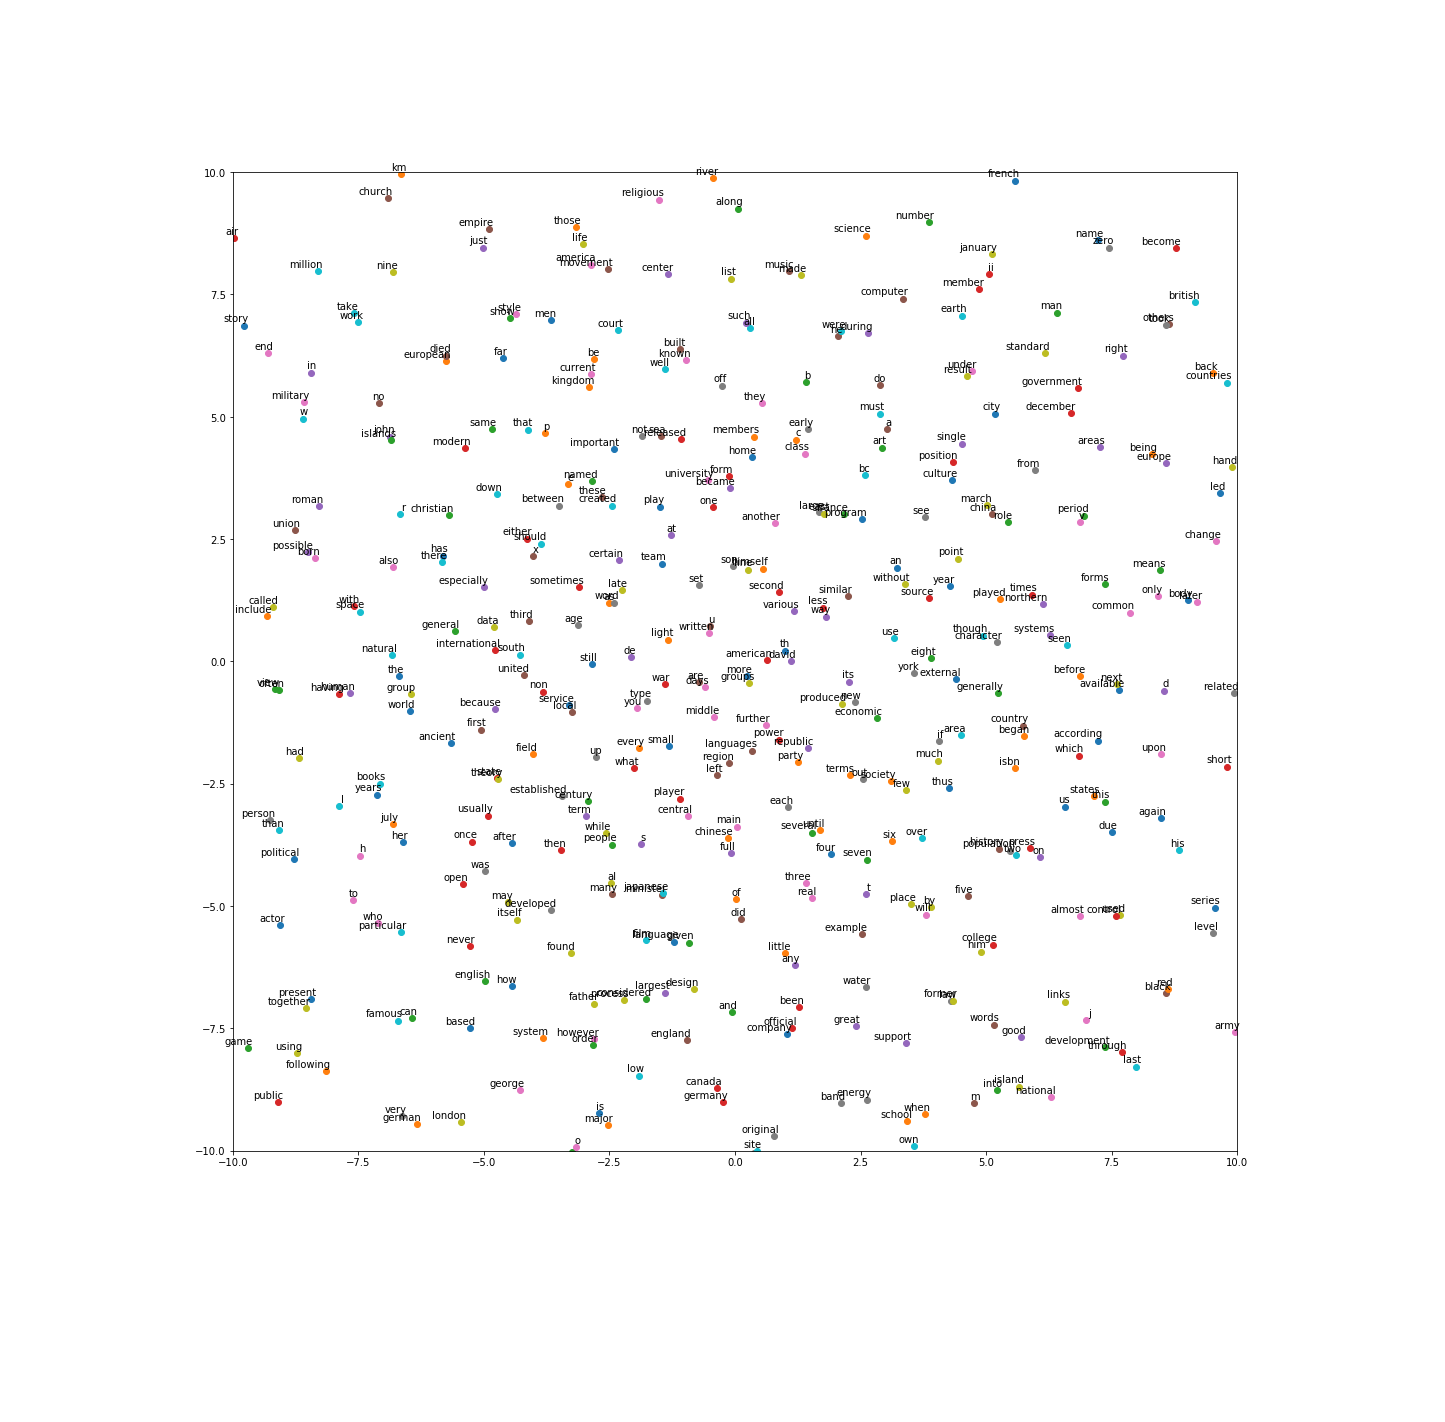

In [69]:
plot_with_labels(low_dim_embs, labels)
plt.xlim(-10,10)
plt.ylim(-10,10)